---
## **`APM1111 - FX P1`**
#### **Author: Sean Angelo T. Lagua**
#### **Date: December 15, 2023**
---

### **Data Preparation**

In loading the data, we make use of Python's ```pandas``` library as well as ```scipy``` to extract the one-way anova module.

In [90]:
import ptitprince as pt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, sem, skew, kurtosis, shapiro, levene
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

The data was then inserted into a dictionary.

In [8]:
data = {
    'Stimuli': ['Shape', 'Shape', 'Shape', 'Shape', 'Shape', 'Shape', 'Shape', 'Shape', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Picture', 'Picture', 'Picture', 'Picture', 'Picture', 'Picture', 'Picture', 'Picture', 'Shape', 'Shape', 'Shape', 'Shape', 'Pattern', 'Pattern', 'Pattern', 'Pattern', 'Picture', 'Picture', 'Picture', 'Picture'],
    'Time': [2, 0.75, 1.25, 1, 1.5, 1.25, 1.75, 0.5, 2.5, 3.25, 1.85, 3.05, 2.5, 3, 4.1, 3.75, 4.25, 4.1, 4.25, 4.4, 3.75, 3.05, 3.2, 5, 2, 0.75, 1.25, 1, 2.5, 3.25, 1.85, 3.05, 4.25, 4.4, 3.75, 3.05]
}

df = pd.DataFrame(data)

group_shape = df[df['Stimuli'] == 'Shape']['Time']
group_pattern = df[df['Stimuli'] == 'Pattern']['Time']
group_picture = df[df['Stimuli'] == 'Picture']['Time']

f_stat, p_value = f_oneway(group_shape, group_pattern, group_picture)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 62.08885876263247
P-value: 6.5317397718921815e-12


### **Assumption Check**

##### **Assumption #1:** You have one dependent variable that is measured at the continuous level.
> ***Remark.*** We have one dependent variable, *time*, which measured the number of seconds the rats spent exploring the experimental chamber with the images, and three treatment conditions (Shape, Pattern, Picture).The dependent variable *time* is measured at a continuous level.

##### **Assumption #2:** You have one independent variable that consists of two categorical, independent groups.
> ***Remark.*** We have an independent variable which consists of the different treatment conditions that the rats were exposed to. These conditions are categorized into independent groups namely, Shape, Pattern, and Picture.

##### **Assumption #3:** You should have independence of observations.
> ***Remark.*** There is no relationship between the observations in each group of the independent variable or between the groups themselves—the values of the weight in each observation are independent of each other.

##### **Assumption #4:** There should be no significant outliers in the three or more groups of your independent variable in terms of the dependent variable.

***Box Plot***

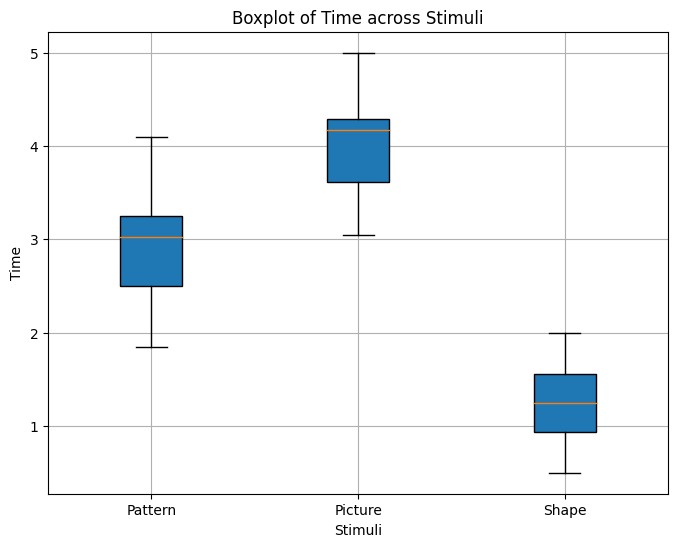

In [12]:
# Grouping data by 'Stimuli'
grouped = df.groupby('Stimuli')['Time']

# Creating a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group[1] for group in grouped], labels=[group[0] for group in grouped], patch_artist=True)
plt.xlabel('Stimuli')
plt.ylabel('Time')
plt.title('Boxplot of Time across Stimuli')
plt.grid(True)
plt.show()

> ***Remark.*** As we can see, there are no significant outliers that we can visually detect with the boxplot. In fact, there are no outliers at all.

##### **Assumption #5:** Your dependent variable should be approximately normally distributed for each group of the independent variable.

In [28]:
def calculate_statistics(data):
    mean = data.mean()
    median = data.median()
    std_err = sem(data)
    std_dev = data.std()
    skewness = skew(data)
    kurt = kurtosis(data)
    shapiro_stat, shapiro_p_value = shapiro(data)
    coeff_variation = (std_dev / mean)  # Coefficient of Variation

    return {
        'Mean': mean,
        'Median': median,
        'Standard Error of Mean': std_err,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Coefficient of Variation': coeff_variation,
        'Shapiro-Wilk Statistic': shapiro_stat,
        'Shapiro-Wilk p-value': shapiro_p_value
    }

# Group data by 'Stimuli'
grouped_data = df.groupby('Stimuli')['Time']

# Calculate statistics for each group
statistics_list = [calculate_statistics(group) for name, group in grouped_data]

# Create a DataFrame from the list of dictionaries
statistics_df = pd.DataFrame(statistics_list, index=grouped_data.groups.keys())

# Display the table
statistics_df


,Mean,Median,Standard Error of Mean,Standard Deviation,Skewness,Kurtosis,Coefficient of Variation,Shapiro-Wilk Statistic,Shapiro-Wilk p-value
Pattern,2.887500,3.025,0.197439,0.683947,0.036017,-0.672380,0.236865,0.950051,0.637731
Picture,3.954167,4.175,0.175428,0.607700,-0.221025,-0.845805,0.153686,0.915158,0.248295
Shape,1.250000,1.250,0.141019,0.488504,0.229081,-1.000000,0.390803,0.943738,0.547955


> ***Remark.*** The time for each group is normally distributed as assessed by the Shapiro-Wilk's test, *p* > 0.05.

##### **Assumption #6:** You have homogeneity of variances (i.e., the variance of the dependent variable i equal in each group of your independent variable).


In [42]:
# Group data by 'Stimuli'
grouped_data = df.groupby('Stimuli')['Time']

# Extract data for each group
group_data = [group for name, group in grouped_data]

# Perform Levene's test for homogeneity of variance
statistic, p_value = levene(*group_data)

# Create a DataFrame to display the test result
homogeneity_result = pd.DataFrame({
    "Levene's Test Statistic": [statistic],
    "p-value": [p_value]
}, index=['Overall'])

# Display the table
homogeneity_result


,Levene's Test Statistic,p-value
Overall,0.431328,0.653256


> ***Remark.*** There was homogeneity of variances of the dependent variables for all of the groups, as assessed by Levene’s test of homogeneity of variances, *p* = 0.653256.

### **Computation**

In [98]:

# Group data by 'Stimuli'
grouped_data = df.groupby('Stimuli')['Time']

# Extract data for each group
group_data = [group for name, group in grouped_data]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*group_data)

# Calculate degrees of freedom
num_groups = len(group_data)
total_samples = len(df)
degrees_of_freedom_between = num_groups - 1
degrees_of_freedom_within = total_samples - num_groups

# Calculate sum of squares
grand_mean = df['Time'].mean()
ss_between = sum(len(data) * (data.mean() - grand_mean)**2 for data in group_data)
ss_within = sum((data - data.mean())**2 for data in group_data)
ss_total = ss_between + ss_within

# Calculate mean squares
ms_between = ss_between / degrees_of_freedom_between
ms_within = ss_within / degrees_of_freedom_within

# Create a DataFrame for the results
anova_table = pd.DataFrame({
    'Source of Variation': ['Stimuli', 'Residual'],
    'Sum of Squares (SS)': [ss_between, ''],
    'Degrees of Freedom (df)': [degrees_of_freedom_between, degrees_of_freedom_within],
    'Mean Squares (MS)': [ms_between, '']
})

# Calculate Total MS
anova_table['Mean Squares (MS)'][2] = ss_total / (total_samples - 1)

# Calculate F-statistic and p-value
anova_table['F-statistic'] = [f_statistic, '']
anova_table['p-value'] = [p_value, '']

# Display the ANOVA table
anova_table

C:\Users\pc\AppData\Local\Temp\ipykernel_17256\1894013298.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_table['Mean Squares (MS)'][2] = ss_total / (total_samples - 1)


,Source of Variation,Sum of Squares (SS),Degrees of Freedom (df),Mean Squares (MS),F-statistic,p-value
0,Stimuli,44.526806,2,22.263403,62.088859,0.0
1,Residual,,33,,,


In [89]:
# Calculate descriptive statistics for the 'Time' column grouped by 'Stimuli'
grouped_stats = df.groupby("Stimuli")['Time'].describe()

# Calculate coefficient of variation for each group
group_cv = grouped_stats['std'] / grouped_stats['mean'] * 100

# Create a DataFrame for descriptive statistics and CV by group
stats_table = pd.concat([grouped_stats, group_cv.rename('Coefficient of Variation')], axis=1)

# Display the table
stats_table

,count,mean,std,min,25%,50%,75%,max,Coefficient of Variation
Stimuli,,,,,,,,,
Pattern,12.0,2.887500,0.683947,1.85,2.5000,3.025,3.2500,4.1,23.686491
Picture,12.0,3.954167,0.607700,3.05,3.6125,4.175,4.2875,5.0,15.368598
Shape,12.0,1.250000,0.488504,0.50,0.9375,1.250,1.5625,2.0,39.080337


In [92]:
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(df['Time'], df['Stimuli'])

# Convert the results to a DataFrame
tukey_table = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Display the table
tukey_table


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Pattern,Picture,1.0667,0.0003,0.4668,1.6665,True
1,Pattern,Shape,-1.6375,0.0000,-2.2374,-1.0376,True
2,Picture,Shape,-2.7042,0.0000,-3.3040,-2.1043,True


### **Report**

In determining impact of 2-dimensional visual stimuli on the spontaneous exploration behavior in rats, a one-way ANOVA was conducted to explore their behavior under three treatments. The rats were exposed to three different stimuli: Shape (n = 12), Pattern (n = 12), Picture (n = 12). There were no visible outliers as visually inspected in the boxplots. Normality was also not violated as assessed and verified by the Shapiro-Wilk test (p > 0.05) strongly suggesting normal distribution; and homogeneity of variances was also maintained as assessed by Levene’s test of homogeneity of variances (p = 0.653256). Data is presented as mean 土 standard deviation. Between the three groups, we can observe that the rats' stimuli is statistically significantly different between the treatment groups with F(2,33) = 62.088859, p < .001, and η²p = 0.790. The rats' behavior increases from Pattern (Mean = 2.888, SD = 0.684) to Picture (Mean = 3.954, SD = 0.608), but dips in value from Picture (Mean = 3.954, SD = 0.608) to Shape (Mean = 1.250, SD = 0.489). The Tukey post hoc analysis also revealed that the mean decrease from Picture to Shape (2.7042, 95% CI[-3.3040, -2.1043], p < 0.001) is statistically significant.